# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 3: Regression Modeling and Bacteria Growing

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2.4pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### Import Libraries

In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

import warnings

<hr style="height:2pt">

### INSTRUCTIONS

- **THIS IS A TWO-WEEK HOMEWORK**. The material is indeed two-weeks-worth of work, so make sure you start it early!!

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. Exceptions should be made for code with a long execution time, of course.
- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.
- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 
- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).
<hr style="height:2pt">


<div class="theme"> Overview and Data Description</div> 

### Predicting percentage change in multiple bacteria populations given their spreading factor.


In this homework, we will mainly explore polynomial regression for 
predicting a quantitative variable. Specifically, we will build 
regression models that can predict the percentage change in 
bacteria population after 4 hours based on their spreading factor. 
These prediction models can be useful in clustering of a novel bacteria to any class. 

If the percentage of change in population increases this indicates 
that the size of the bacteria population is growing. 
One important factor to note is that the percentage change could be negative. 
This indicates that within the specified time frame, 
the population of the bacteria decreases from the original size.

The data set for this problem has already been split for you. You will find the train and test data sets in the files `data/bacteria_train.csv` and `data/bacteria_test.csv`, respectively. The first column in each file contains the spreading factor of bacteria populations and the second column gives information about the change in percentage of the population. 



 ### Problem Description
Given the bacteria data, we will predict the percentage change in population, giving the spreading factor. For this exercise, we will consider the `Spreading_factor` to be our predictor variable and `Perc_population` to be our response variable. We will fit a polynomial regression model for a specified degree that computes the respective degree predictors to fit a model on the training set, which will be evaluated on the test set. The performance of the models should be evaluated using their $MSE$.



<div class='exercise'><b> Question 1:   Data Visualization [10 points total]</b>
    
**1.1** [6 pts] Generate a scatter plot of the data points in the `bacteria_train.csv` 
file with the `Spreading factor` on the $X$-axis and the `Percentage change` on the $Y$-axis. Make sure you clearly label the $x$ and $y$ axes and include proper title. 

**1.2** [4 pts] Based on the graph, is there any discernable relationship between 
the spreading factor and percentage change in population?
    
</div>


### Your Answers

<div class='exercise-r'>  
 
**1.1** [6 pts] Generate a scatter plot of the data points in the `bacteria_train.csv`
 file with the `Spreading factor` on the $X$-axis and the `Percentage change` on the $Y$-axis. Make sure you clearly label the $x$ and $y$ axes and include proper title.
 
 </div>

Text(0.5, 1.0, 'Bacteria Training Data')

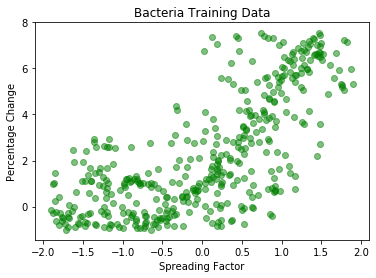

In [3]:
# your code here
bacteria_train = pd.read_csv(r'data/bacteria_train.csv')
bacteria_train.head()

#simple scatter
plt.scatter(bacteria_train.Spreading_factor, bacteria_train.Perc_population, color = 'g', alpha = 0.5)
plt.xlabel("Spreading Factor")
plt.ylabel("Percentage Change")
plt.title("Bacteria Training Data")

Text(0.5, 1.0, 'Bacteria Test Data')

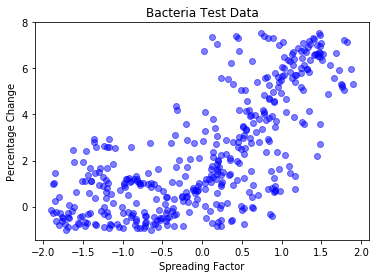

In [4]:
# your code here
# we plot test data just for our convenience (it's nice to get a high-level view of the data before the problems)
bacteria_test = pd.read_csv(r'data/bacteria_test.csv')
bacteria_test.head()

#simple scatter
plt.scatter(bacteria_train.Spreading_factor, bacteria_train.Perc_population, color = 'b', alpha = 0.5)
plt.xlabel("Spreading Factor")
plt.ylabel("Percentage Change")
plt.title("Bacteria Test Data")

<div class='exercise-r'>  
 
**1.2** [4 pts] Based on the graph, is there any discernable relationship between
 the spreading factor and percentage change in population?
 
 </div>

There is a discernable relationship between spreading factor and percentage change in population. The relationship appears to be almost piecewise and seems consistent between the testing and training data. It seems that a spreading factor of 0 is the approximate point where the relationship changes. For negative Spreading Factors, the relationship with Percentage Change seems approximately flat, but for positive values of Spreading Factor there is clearly a positive relationship with Percentage Change.

<hr style='height:2px'> 

### Your HW3 Roadmap

We will be following this roadmap for the rest of the homework.

![](soln-roadmap.png)


<div class='exercise'><b> Question 2:   Model Building: Guesstimate the polynomial relationship [10 points total]</b>

**2.1** [5 pts] Examine the relationship between the predictor & response variable, and guesstimate the degree of the polynomial regression that may best fit the data.
- Create a dictionary called `best_mse_dict` to store the best test MSEs for each type of model. The keys of this dictionary will be the question number, and the values will be the MSE values. So, for this question, you will have `best_mse_dict["2,1"] = ...` .
- Fit a polynomial regression on the training set.
- Compute and print the mean_squared_error on the test set.
- Generate a scatterplot of the data (as in 1.1) and plot your model's predictions in a different color. Make sure to label axes and include a descriptive title. Comment on the fit.
- Explain your guesstimation of the degree.

**2.2** [5 pts] Compute the confidence intervals for the coefficients. For the model fit above plot the 95% confidence interval of the beta values obtained in the regression model above.
- Display the coefficient values of the model fit above.
- For each bootstrap store the coefficients of the model as a list
- Using the bootstrap list compute the 2.5 and 97.5 confidence points.
- Plot the bootstrap data as a histogram of `Value of beta` vs. `Distribution of beta` for each beta value. Each figure should indicate regions of 95% confidence interval. As always, each figure must have appropriate axis labels and title. Use `plt.subplots(...)` to arrange your plots.

**Hints**
- Bootstrap for entire fraction (100%) of the training data.
- Limit the number of bootstraps to 100.
    
    
</div>


### Answers

<div class='exercise-r'>  
 
**2.1** [5 pts] Examine the relationship between the predictor & response variable, and guesstimate the degree of the polynomial regression that may best fit the data.
 - Create a dictionary called `best_mse_dict` to store the best test MSEs for each type of model. The keys of this dictionary will be the question number, and the values will be the MSE values. So, for this question, you will have `best_mse_dict["2,1"] = ...` .
 - Fit a polynomial regression on the training set.
 - Compute and print the mean_squared_error on the test set.
 - Generate a scatterplot of the data (as in 1.1) and plot your model's predictions in a different color. Make sure to label axes and include a descriptive title. Comment on the fit.
 - Explain your guesstimation of the degree.
 
 </div>

In [5]:
# Make a global dictionary to save the MSE values
# your code here
best_mse_dict = {}

In [6]:
# read the data 
# your code here
bacteria_train = pd.read_csv(r'data/bacteria_train.csv')
bacteria_test = pd.read_csv(r'data/bacteria_test.csv')

x_train, y_train = bacteria_train[['Spreading_factor']].values, bacteria_train.Perc_population.values
x_test, y_test = bacteria_test[['Spreading_factor']].values, bacteria_test.Perc_population.values

In [7]:
# Guesstimate degree of the curve
# your code here 

# Guess degree 2
guess_degree = 2

# Generate polynomial features on the training and test data
x_poly_train = PolynomialFeatures(degree=guess_degree).fit_transform(x_train)
x_poly_test = PolynomialFeatures(degree=guess_degree).fit_transform(x_test)

# Fit a polynomial model on the data, using x_poly as features
# Per Mike Sedelmeyer's comment on Ed, because PolynomialFeatures defaults to include_bias=True,
# we should use fit_intercept=False in our LinearRegression
polymodel = LinearRegression(fit_intercept=False)
polymodel.fit(x_poly_train,y_train)

# Predict using the test data
y_poly_pred_test = polymodel.predict(x_poly_test)

In [8]:
# Compute the mean_squared_error on the test set and name it mse 
# Add it to best_mse_dict
# your code here 
mse = mean_squared_error(y_test,y_poly_pred_test)

best_mse_dict[2.1] = mse

print("MSE on the test set: " + str(best_mse_dict[2.1]))

MSE on the test set: 2.6748625754403093


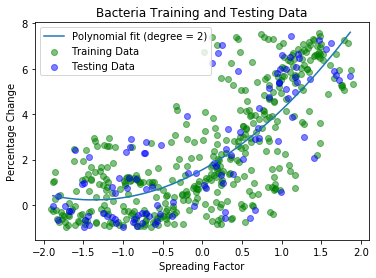

In [9]:
# your code here
# To visualise the results, sort the x values
idx = np.argsort(x_test[:,0])
x_test = x_test[idx]

# Use the above index to get the appropriate predicted values for y
# y values corresponding to sorted x
y_test = y_test[idx]

#Non-linear predicted values
y_poly_pred_test = y_poly_pred_test[idx]

# scatter plot training data and the guesstimated polynomial model
#Per Nabib's Ed comment, we scatter both train and test data
plt.scatter(x_train, y_train, color = 'g', alpha = 0.5, label = "Training Data")
plt.scatter(x_test, y_test, color = 'b', alpha = 0.5, label = "Testing Data")
plt.plot(x_test, y_poly_pred_test, label = "Polynomial fit (degree = 2)")
plt.legend()
plt.xlabel("Spreading Factor")
plt.ylabel("Percentage Change")
plt.title("Bacteria Training and Testing Data")
plt.show()

The fit seems pretty good for most of the train and test data. The degree of 2 was selected because a quadratic polynomial can capture most of the piecewise relationship mentioned in question 1.2, and a higher degree polynomial would likely not capture much more of the relationship in the data and we always run the risk of overfitting by increasing the degrees of the polynomial. Of course, the fit is best for the middle of our ranges in Spreading Factor, but even at the edges of the range the fit seems pretty strong. One area our fit could be improved would be in the range [1.5,2] of Spreading Factor.

<div class='exercise-r'>  
 
**2.2** [5 pts] Compute the confidence intervals for the coefficients. For the model fit above plot the 95% confidence interval of the beta values obtained in the regression model above.
 - Display the coefficient values of the model fit above.
 - For each bootstrap store the coefficients of the model as a list
 - Using the bootstrap list compute the 2.5 and 97.5 confidence points.
 - Plot the bootstrap data as a histogram of `Value of beta` vs. `Distribution of beta` for each beta value. Each figure should indicate regions of 95% confidence interval. As always, each figure must have appropriate axis labels and title. Use `plt.subplots(...)` to arrange your plots.
 
 **Hints**
 - Bootstrap for entire fraction (100%) of the training data.
 - Limit the number of bootstraps to 100.
 
 
 </div>

In [10]:
# your code here
# Display the coefficients of the fitted model from 2.1
for i in range(guess_degree + 1):
    print("Beta " + str(i) + " coefficient: " + str(polymodel.coef_[i]))

Beta 0 coefficient: 1.5479189777983176
Beta 1 coefficient: 1.9379680565747694
Beta 2 coefficient: 0.7063789121219994


In [11]:
# your code here
# create empty dictionary to store lists of beta values for 100 bootstraps
beta_dict = {}

numBoots = 100

for i in range(numBoots):
    # Bootstrap using df.sample method.
    df_new = bacteria_train.sample(frac=1,replace=True)
    x = df_new[['Spreading_factor']]
    y = df_new.Perc_population
    
    # Generate polynomial features
    x_poly = PolynomialFeatures(degree=guess_degree).fit_transform(x)
    
    # Fit a polynomial model on the data, using x_poly as features
    polymodel = LinearRegression(fit_intercept=False)
    polymodel.fit(x_poly,y)
    for j in range(guess_degree + 1):
        if i == 0:
            beta_dict[j] = [polymodel.coef_[j]]
        else:
            beta_dict[j].append(polymodel.coef_[j])

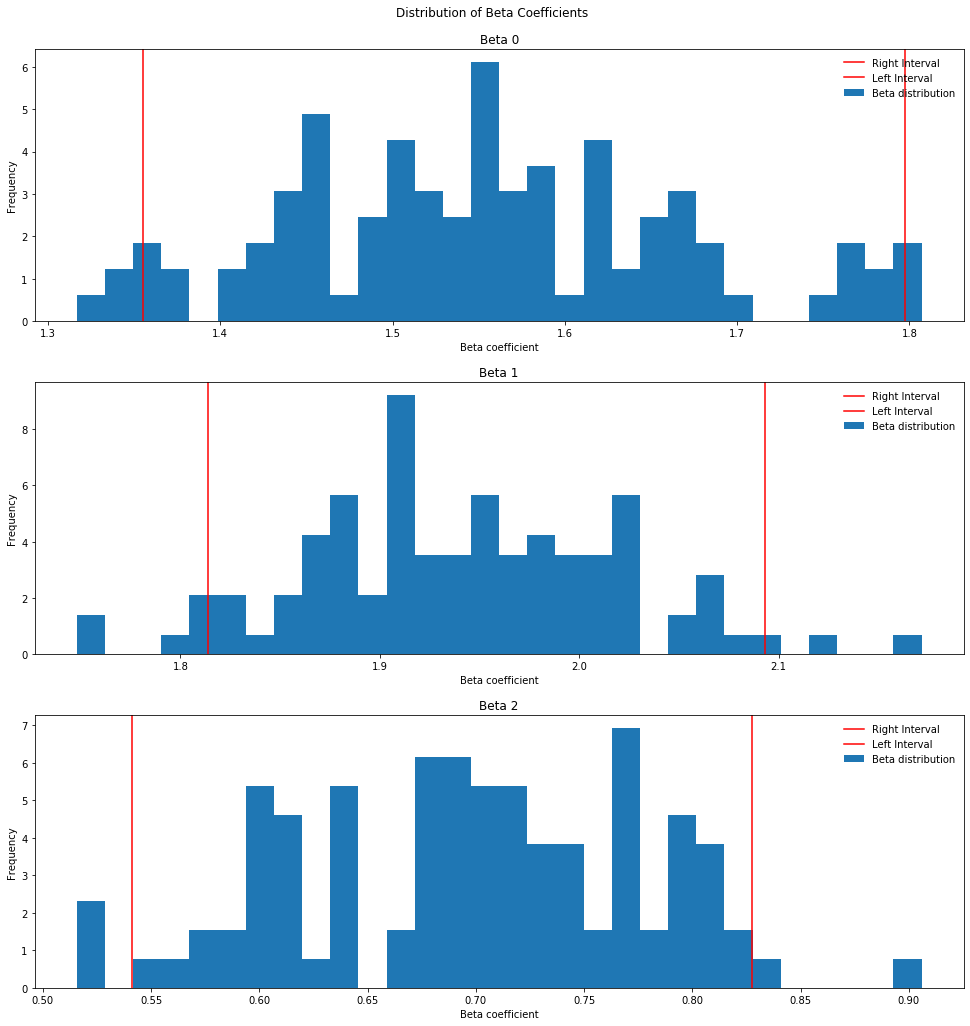

In [12]:
beta_CI = {}

fig, ax = plt.subplots(len(beta_dict.keys()),1)
fig.suptitle("Distribution of Beta Coefficients")
fig.set_figwidth(15)
fig.set_figheight(15)
fig.tight_layout(pad=6,h_pad=4,w_pad=4)

for i in range(len(beta_dict.keys())):
    # sort the list of beta values from lowest to highest
    beta_dict[i].sort()
    # Find the 95% percent confidence interval using the percentile function
    beta_CI[i] = (np.percentile(beta_dict[i],q=2.5),np.percentile(beta_dict[i],q=97.5))
    # plot histogram
    ax[i].hist(beta_dict[i], bins = 30, label = 'Beta distribution', align = 'left', density = True)
    ax[i].axvline(beta_CI[i][1], 0, 1, color = 'r', label = 'Right Interval')
    ax[i].axvline(beta_CI[i][0], 0, 1, color = 'red', label = 'Left Interval')
    ax[i].set_xlabel('Beta coefficient')
    ax[i].set_ylabel('Frequency')
    ax[i].set_title('Beta '+ str(i))
    ax[i].legend(frameon = False, loc = 'upper right')

<div class='exercise'><b> Question 3:   Use a validation set to find the most promising polynomial relationship [12 points total]</b>

**3.1** [4 pts] Take out a small fraction of the training set for **validation**.
- Compare degrees up to 30
- For each degree of the polynomial
     - Fit a polynomial regression on the training set.
     - Calculate the mean_squared_error ($MSE$) on the *validation set*.
    
- Compare the values of the validation set, and select the degree for which the validation error is the least.

**Hints**
- Manually implement the validation - do not use `sklearn` for this question.

**3.2** [4 pts] Now, with the best selected degree, again train the polynomial regression on the **complete training set** (including the small fraction that you took out to make the validation set). 
Compute and print the $MSE$ on the test set and add it to `best_mse_dict`.


**3.3** [4 pts] Generate a scatterplot of the data (as in 1.1) and plot your model's predictions in a different color. Make sure to label axes and include a descriptive title. Comment on how your model fits the data.

</div>  
                                                                                                                                 

### Your Answers

<div class='exercise-r'>  
 
**3.1** [4 pts] Take out a small fraction of the training set for **validation**.
 - Compare degrees up to 30
 - For each degree of the polynomial
 - Fit a polynomial regression on the training set.
 - Calculate the mean_squared_error ($MSE$) on the *validation set*.
 
 - Compare the values of the validation set, and select the degree for which the validation error is the least.
 
 **Hints**
 - Manually implement the validation - do not use `sklearn` for this question.
 
 </div>

In [13]:
# your code here
# read the data 
bacteria_train = pd.read_csv(r'data/bacteria_train.csv')
bacteria_test = pd.read_csv(r'data/bacteria_test.csv')

x_train, y_train = bacteria_train[['Spreading_factor']].values, bacteria_train.Perc_population.values
x_test, y_test = bacteria_test[['Spreading_factor']].values, bacteria_test.Perc_population.values

In [14]:
# split the train data into train and validation sets 
# with 80% of the data as the train data and random_state=44
# your code here
new_x_train, x_validation, new_y_train, y_validation  = train_test_split(x_train, y_train, test_size=0.2, random_state=44)

In [15]:
# your code here
maxdeg = 30 
val_mse = {}
train_mse = {}


for i in range(maxdeg+1): #so that we have 30 as the maximum degree
    new_x_poly_train = PolynomialFeatures(degree=i).fit_transform(new_x_train)
    new_x_poly_val = PolynomialFeatures(degree=i).fit_transform(x_validation)
    
    polymodel = LinearRegression(fit_intercept=False)
    polymodel.fit(new_x_poly_train,new_y_train)
    
    y_poly_pred_train = polymodel.predict(new_x_poly_train)
    y_poly_pred = polymodel.predict(new_x_poly_val)
    val_mse[i] = mean_squared_error(y_validation, y_poly_pred)
    train_mse[i] = mean_squared_error(new_y_train, y_poly_pred_train)

In [16]:
# your code here
low_val = min(val_mse.values())

for key, value in val_mse.items():
    if value == low_val:
        low_val_degree = key

In [17]:
# Print the train and validation MSE along with the degree of the best model. 
# To do this find the degree that gives the lowest MSE.
# your code here 

print("The best degree is: {degree} with a validation MSE of {mse}, and a train MSE of {mse2}".format(degree = low_val_degree, mse = low_val, mse2 = train_mse[low_val_degree]))

The best degree is: 15 with a validation MSE of 2.7642741851813257, and a train MSE of 2.4418121174538845


<div class='exercise-r'>  
 
**3.2** [4 pts] Now, with the best selected degree, again train the polynomial regression on the **complete training set** (including the small fraction that you took out to make the validation set).
 Compute and print the $MSE$ on the test set and add it to `best_mse_dict`.
 
 
 </div>

In [18]:
# your code here
best_degree = low_val_degree

x_poly_train = PolynomialFeatures(degree=best_degree).fit_transform(x_train)
x_poly_test = PolynomialFeatures(degree=best_degree).fit_transform(x_test)

# Fit a polynomial model on the data, using x_poly as features
polymodel = LinearRegression()
polymodel.fit(x_poly_train,y_train)

# Predict using the test data
y_poly_pred = polymodel.predict(x_poly_test)

In [19]:
# your code here
#compute MSE
mse = mean_squared_error(y_test, y_poly_pred)
print("MSE on the test set: " + str(mse))

best_mse_dict[3.2] = mse

MSE on the test set: 2.7364825064084943


<div class='exercise-r'>  
 
**3.3** [4 pts] Generate a scatterplot of the data (as in 1.1) and plot your model's predictions in a different color. Make sure to label axes and include a descriptive title. Comment on how your model fits the data.
 
 
 </div>

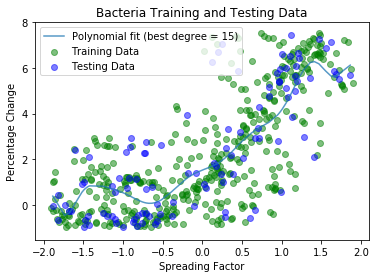

In [20]:
# your code here
# To visualise the results, sort the x values
idx = np.argsort(x_test[:,0])
x_test = x_test[idx]

# Use the above index to get the appropriate predicted values for y
# y values corresponding to sorted x
y_test = y_test[idx]

#Non-linear predicted values
y_poly_pred= y_poly_pred[idx]

plt.scatter(x_train, y_train, color = 'g', alpha = 0.5, label = "Training Data")
plt.scatter(x_test, y_test, color = 'b', alpha = 0.5, label = "Testing Data")
plt.plot(x_test, y_poly_pred, label = "Polynomial fit (best degree = " + str(low_val_degree) + ")", alpha = 0.75)
plt.legend()
plt.xlabel("Spreading Factor")
plt.ylabel("Percentage Change")
plt.title("Bacteria Training and Testing Data")
plt.show()

According to the MSEs, this model actually performs worse than our model from question 2 with a guesstimated degree of 2. A degree of 15 allows our model to capture much of the variability in our data, but it also causes our model to suffer from a high degree of overfitting which has caused our model to perform worse on the test dataset.

<div class='exercise'><b> Question 4:   Finding the best model by k-fold cross-validation [15 points total]</b>

**4.1** [5 pts] In this part we find the best degree of the polynomial regression by running the model on a range of degree values and using k-fold cross validation. Use the `bacteria_train.csv` to train the model and `bacteria_test.csv` to test the model.

**Instructions**
- Read the train and test csv files.
- Assign the predictor and response variables appropriately
- Compute polynomial features up to degree 30. 
- For each degree in this range perform the following:
    - Compute the polynomial features for the data.
    - Perform k-fold cross validation with k=10
    - Compute the polynomial features for the data.
    - Compute the $MSE$ of the train and validation data and store in separate lists. 
- Print the train and validation MSE along with the degree of the best model. To do this find the degree that gives the lowest validation MSE.


#### Hints
* Use sklearn `cross_validate()` to perform cross validation.

**4.2** [5 pts] Fitting the best model on the test data and compute and print the $MSE$ on the test set.

**Instructions**
- For the best degree computed above, compute the polynomial features for the data in the test csv file.
- Train on the entire data from the train csv file and predict on the test data.
- Report the $MSE$ for the fitted models on both the training and test sets. Save the **test** MSE in `best_mse_dict`.
- Print the coefficients of the model.

**Hints**
* Sort the $x$ values before making your plots.

**4.3** [5 pts] Generate a scatterplot of the data (as in 1.1) and plot your model's predictions in a different color. Make sure to label axes and include a descriptive title. Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated.
    
</div>

### Your Answers

<div class='exercise-r'>  
 
**4.1** [5 pts] In this part we find the best degree of the polynomial regression by running the model on a range of degree values and using k-fold cross validation. Use the `bacteria_train.csv` to train the model and `bacteria_test.csv` to test the model.
 
 **Instructions**
 - Read the train and test csv files.
 - Assign the predictor and response variables appropriately
 - Compute polynomial features up to degree 30.
 - For each degree in this range perform the following:
 - Compute the polynomial features for the data.
 - Perform k-fold cross validation with k=10
 - Compute the polynomial features for the data.
 - Compute the $MSE$ of the train and validation data and store in separate lists.
 - Print the train and validation MSE along with the degree of the best model. To do this find the degree that gives the lowest validation MSE.
 
 
 #### Hints
 * Use sklearn `cross_validate()` to perform cross validation.
 
 </div>

In [21]:
# your code here
# Read the train and test csv files
bacteria_train = pd.read_csv(r'data/bacteria_train.csv')
bacteria_test = pd.read_csv(r'data/bacteria_test.csv')

# Assign the predictor and response variables appropriately
x_train, y_train = bacteria_train[['Spreading_factor']].values, bacteria_train.Perc_population.values
x_test, y_test = bacteria_test[['Spreading_factor']].values, bacteria_test.Perc_population.values

In [22]:
# your code here
# To iterate over the range, select the maximum degree of the polynomial as degree 30
maxdeg = 30

# Create three empty lists to store training, validation and cross-validation MSEs
training_error, cross_validation_error = [],[]

#Run a for loop through the degrees of the polynomial, fit linear regression,
#predict y values and calculate the training and validation errors and update it to the list
for d in range(maxdeg+1): #so that we have 30 as the maximum degree
    
    #Compute the polynomial features for the training data
    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)

    #Get a Linear Regression object
    lreg = LinearRegression(fit_intercept=False)
    
    #Perform cross-validation on the training data with 10 folds and get the mse_scores
    mse_score = cross_validate(lreg,x_poly_train,y_train,cv=10,scoring='neg_mean_squared_error')
    
    #Fit model on the training set
    lreg.fit(x_poly_train, y_train)

    #Predict of the training set
    y_train_pred = lreg.predict(x_poly_train)
    
    #Compute the training and cross-validation MSE
    training_error.append(mean_squared_error(y_train,y_train_pred))
    cross_validation_error.append(np.mean(abs(mse_score['test_score'])))
    
#Print the train and cross-validation MSE
print(training_error)
print(cross_validation_error)

[6.421273282072778, 3.0997346925481057, 2.661715130324049, 2.6534065590397877, 2.5709143393298977, 2.5708486745031984, 2.55939790303801, 2.5456979525219583, 2.512517457472788, 2.512517412701823, 2.511168115007783, 2.510854646349157, 2.5051010606551385, 2.4999307646753968, 2.494792165627698, 2.490945608870429, 2.490621553056282, 2.4897111186465697, 2.4885113718376997, 2.485886814711185, 2.4831812685408017, 2.483057816799043, 2.483054510930709, 2.4813480015771274, 2.479781436886132, 2.479630436588228, 2.4780703363176824, 2.4757547039129473, 2.4704508299839545, 2.467668621676715, 2.451511896685074]
[6.437577187336556, 3.1210545089333666, 2.6973468049700733, 2.69925396875393, 2.6223667883319552, 2.6299637455758016, 2.629076074712998, 2.634179062808938, 2.5990753511998603, 2.6117089871162604, 2.620537025040356, 2.6305483513413805, 2.6234700955870793, 2.636918807092947, 2.6309130482174448, 2.6359045623067097, 2.644512948179859, 2.6551145815394253, 2.6734433444328998, 2.6646023446295075, 2.72

In [23]:
# your code here
# The best degree with the lowest cross validation error
min_mse = min(cross_validation_error)
best_degree = cross_validation_error.index(min_mse)

In [24]:
# your code here
print("The best degree is: {degree} with a cross-validation MSE of: {mse} and a train MSE of: {mse2}".format(degree = best_degree, mse = min_mse,mse2 = training_error[best_degree]))

The best degree is: 8 with a cross-validation MSE of: 2.5990753511998603 and a train MSE of: 2.512517457472788


In [25]:
# Find the best value of d, which gives the least error on the test data
# best_d = min(mse_error, key=mse_error.get)
# your code here

In [26]:
# your code here


<div class='exercise-r'>  
 
**4.2** [5 pts] Fitting the best model on the test data and compute and print the $MSE$ on the test set.
 
 **Instructions**
 - For the best degree computed above, compute the polynomial features for the data in the test csv file.
 - Train on the entire data from the train csv file and predict on the test data.
 - Report the $MSE$ for the fitted models on both the training and test sets. Save the **test** MSE in `best_mse_dict`.
 - Print the coefficients of the model.
 
 **Hints**
 * Sort the $x$ values before making your plots.
 
 </div>

In [27]:
#Compute the polynomial features
# your code here
x_poly_train = PolynomialFeatures(best_degree).fit_transform(x_train)
x_poly_test = PolynomialFeatures(best_degree).fit_transform(x_test)

#Get a Linear Regression object
lreg = LinearRegression(fit_intercept=False)

#Fit model on the training set
lreg.fit(x_poly_train, y_train)

#Predict of the traing set
y_train_pred = lreg.predict(x_poly_train)
#Predict of the testing set
y_test_pred = lreg.predict(x_poly_test)

In [28]:
# your code here
train_mse = mean_squared_error(y_train, y_train_pred)
best_mse_dict[4.2] = mean_squared_error(y_test,y_test_pred)
print("Train MSE: " + str(train_mse))
print("Test MSE: " + str(best_mse_dict[4.2]))

Train MSE: 2.512517457472788
Test MSE: 2.613010637353011


In [29]:
# your code here
for i in range(best_degree+1):
    print("Beta " + str(i)+ " coefficient: " + str(lreg.coef_[i]))

Beta 0 coefficient: 1.5353335725001427
Beta 1 coefficient: 2.5970277751111728
Beta 2 coefficient: -1.0948684730724736
Beta 3 coefficient: -1.1891344117017746
Beta 4 coefficient: 3.4831491377614556
Beta 5 coefficient: 0.6528766407091469
Beta 6 coefficient: -1.7130078660041193
Beta 7 coefficient: -0.1153051629180405
Beta 8 coefficient: 0.2404183735140446


<div class='exercise-r'>  
 
**4.3** [5 pts] Generate a scatterplot of the data (as in 1.1) and plot your model's predictions in a different color. Make sure to label axes and include a descriptive title. Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated.
 
 </div>

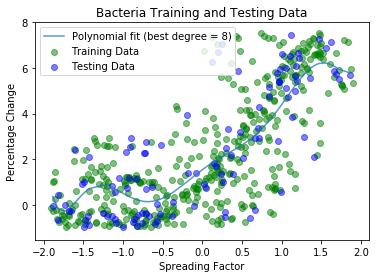

In [30]:
# your code here
# To visualise the results, sort the x values
idx = np.argsort(x_test[:,0])
x_test = x_test[idx]

# Use the above index to get the appropriate predicted values for y
# y values corresponding to sorted x
y_test = y_test[idx]

#Non-linear predicted values
y_test_pred= y_test_pred[idx]

plt.scatter(x_train, y_train, color = 'g', alpha = 0.5, label = "Training Data")
plt.scatter(x_test, y_test, color = 'b', alpha = 0.5, label = "Testing Data")
plt.plot(x_test, y_test_pred, label = "Polynomial fit (best degree = " + str(best_degree) + ")", alpha = 0.75)
plt.legend()
plt.xlabel("Spreading Factor")
plt.ylabel("Percentage Change")
plt.title("Bacteria Training and Testing Data")
plt.show()

According to the MSEs, this model of degree 8 performs much better than our model of degree 15 from the question 3. This model also has a lower test MSE than our guesstimated model of degree 2 from question 2. A degree of 8 allows our model to fit more of the variability in the data than the model of degree 2, but also does not suffer as severly from the overfitting problems that the model of degree 15 did, explaining why this model has performed the best on our test MSEs. From inspecting the graph, the model seems to hold well for the middle value of our range of data, but seems to suffer from overfitting at the edges of our range of data. In particular, if we were to extrapolate for Spreading Factors beyond -2 and 2 our model seems to be providing a very poor prediction. At both 2 and -2 the model actually predicts decreasing Percentage Change, which from our intuition does not seem to be where the data implies our model should extrapolate (beyond the data set) to.

<div class='exercise'><b> Question 5:   Finding the most <b>consistent</b> model; use k-fold cross validation along with bootstraps [13 points total]</b>

**5.1** [5 pts] In the previous part, we used k-fold cross-validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps earlier to estimate the confidence interval of our $\beta_i$ values. In this segment, we will use *bootstrapping* to test the robustness of our estimation. As before, we use the `bacteria_train.csv` to train the model and `bacteria_test.csv` to test the model.

**Instructions**
- Read the train and test csv files.
- Assign the predictor and response variables appropriately
- Select the max degree for computing the polynomial features and number of bootstraps.
- Create bootstraps of the data. For each bootstrap perform the following:
    - For each degree in the range of max degree perform the following:
        - Compute the polynomial features for the data.
        - Perform k-fold cross validation with k=10
        - Compute the polynomial features for the data.
        - Compute the $MSE$ of the train and validation data and store in separate lists. 
    - Select the degree for which the mean of the k-fold **validation** $MSE$ is the least.
    - Store the best degree in a list
- Plot a histogram with `Degree of polynomial` on the $x$-axis and `Number of degrees voted best` on the $y$-axis, from the above steps.
- The degree voted best the most times can be selected as the best degree
- Retrain on the entire test set and report the $MSE$ on the test set.

**Hints**
- Limit the maximum degree to 50.
- Limit the number of bootstraps to 100.
- Use sklearn `cross_validate()` to perform cross validation.

**5.2** [3 pts] What are your observations? 

- Why do you see so much variance in the `best_degree` over the bootstraps?
- What will you choose as your `best_degree` for the test set? 

**5.3** [5 pts] Fitting the best model on the test data.

**Instructions**
- For the best degree computed above, compute the polynomial features for the data in the test csv file.
- Train on the entire data from the train csv file and predict on the test data.
- Print the MSE of the model on the test data, and save it in `best_mse_dict`
- Make a scatter plot of `Spread factor` vs. `Percentage change in population` for your best degree. The figure should have plot of the test prediction from the regression and the actual values on the same figure. Plot the fit curve as well, and comment on how it fits the data, as well as how it compares to prior model fits.
- Print the coefficients of the model
    
    
</div>

### Your Answers

<div class='exercise-r'>  
 
**5.1** [5 pts] In the previous part, we used k-fold cross-validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps earlier to estimate the confidence interval of our $\beta_i$ values. In this segment, we will use *bootstrapping* to test the robustness of our estimation. As before, we use the `bacteria_train.csv` to train the model and `bacteria_test.csv` to test the model.
 
 **Instructions**
 - Read the train and test csv files.
 - Assign the predictor and response variables appropriately
 - Select the max degree for computing the polynomial features and number of bootstraps.
 - Create bootstraps of the data. For each bootstrap perform the following:
 - For each degree in the range of max degree perform the following:
 - Compute the polynomial features for the data.
 - Perform k-fold cross validation with k=10
 - Compute the polynomial features for the data.
 - Compute the $MSE$ of the train and validation data and store in separate lists.
 - Select the degree for which the mean of the k-fold **validation** $MSE$ is the least.
 - Store the best degree in a list
 - Plot a histogram with `Degree of polynomial` on the $x$-axis and `Number of degrees voted best` on the $y$-axis, from the above steps.
 - The degree voted best the most times can be selected as the best degree
 - Retrain on the entire test set and report the $MSE$ on the test set.
 
 **Hints**
 - Limit the maximum degree to 50.
 - Limit the number of bootstraps to 100.
 - Use sklearn `cross_validate()` to perform cross validation.
 
 </div>

In [31]:
# your code here
# Read the train and test csv files
bacteria_train = pd.read_csv(r'data/bacteria_train.csv')
bacteria_test = pd.read_csv(r'data/bacteria_test.csv')

# Assign the predictor and response variables appropriately
x_train, y_train = bacteria_train[['Spreading_factor']].values, bacteria_train.Perc_population.values
x_test, y_test = bacteria_test[['Spreading_factor']].values, bacteria_test.Perc_population.values

# Select maximum degree 50
maxdeg = 51 # so that 50 is the maximum degree

In [32]:
# your code here
# create empty list to store best degrees
degree_list = []

numBoots = 100

for i in range(numBoots):
    df_new = bacteria_train.sample(frac=1,replace=True)
    x_train = df_new[['Spreading_factor']].values
    y_train = df_new.Perc_population
    # Create two empty lists to store training, validation and cross-validation MSEs
    training_error, cross_validation_error = [],[]
    for d in range(maxdeg):
        #Compute the polynomial features for the data
        x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
        
        #Get a Linear Regression object
        lreg = LinearRegression(fit_intercept=False)
        
        #Perform k-fold cross validation with k=10
        mse_score = cross_validate(lreg,x_poly_train,y_train,cv=10,scoring='neg_mean_squared_error')
        
        #Fit model on the training set
        lreg.fit(x_poly_train, y_train)

        #Predict of the training set
        y_train_pred = lreg.predict(x_poly_train)
    
        #Compute the training and cross-validation MSE
        training_error.append(mean_squared_error(y_train,y_train_pred))
        cross_validation_error.append(np.mean(abs(mse_score['test_score'])))
        
    #Select the degree for which the mean of the k-fold validation MSE is the least
    min_mse = min(cross_validation_error)
        
    #Store the best degree in a list
    degree_list.append(cross_validation_error.index(min_mse))

The most voted on degree is: 8


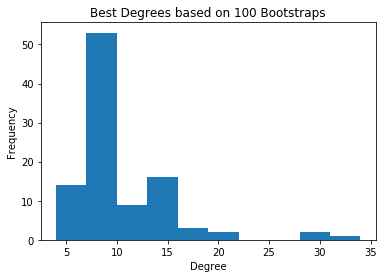

In [33]:
# your code here
plt.hist(degree_list)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Best Degrees based on 100 Bootstraps")

# select the degree voted the most number of times as the best_degree
best_degree = max(set(degree_list), key=degree_list.count)
print("The most voted on degree is: " + str(best_degree))

<div class='exercise-r'>  
 
**5.2** [3 pts] What are your observations?
 
 - Why do you see so much variance in the `best_degree` over the bootstraps?
 - What will you choose as your `best_degree` for the test set?
 
 </div>

8 by far is the most voted on best degree as seen in the histogram, so that's what we will select as our best_degree. Surprisingly, we see big variance in best_degree over the bootstrap, likely because of natural randomness from bootstrapping capturing how much variance there is in our train data. Observing our fitted model in question 4 with the polynomial model of degree 8, the train data has many points that have large deviations from our fitted line (model). Bootstrapping with replacement means that this variance leads to large variance in our best_degrees.

<div class='exercise-r'>  
 
**5.3** [5 pts] Fitting the best model on the test data.
 
 **Instructions**
 - For the best degree computed above, compute the polynomial features for the data in the test csv file.
 - Train on the entire data from the train csv file and predict on the test data.
 - Print the MSE of the model on the test data, and save it in `best_mse_dict`
 - Make a scatter plot of `Spread factor` vs. `Percentage change in population` for your best degree. The figure should have plot of the test prediction from the regression and the actual values on the same figure. Plot the fit curve as well, and comment on how it fits the data, as well as how it compares to prior model fits.
 - Print the coefficients of the model
 
 
 </div>

In [34]:
# your code here
# Read the train and test csv files
bacteria_train = pd.read_csv(r'data/bacteria_train.csv')
bacteria_test = pd.read_csv(r'data/bacteria_test.csv')

# Assign the predictor and response variables appropriately
x_train, y_train = bacteria_train[['Spreading_factor']].values, bacteria_train.Perc_population.values
x_test, y_test = bacteria_test[['Spreading_factor']].values, bacteria_test.Perc_population.values

In [35]:
# Select the best degree from the above exercise
# your code here
d = best_degree

In [36]:
#Compute the polynomial features
# your code here
x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
x_poly_test = PolynomialFeatures(d).fit_transform(x_test)

In [37]:
# your code here
# Train on the entire data from the train csv file
#Get a Linear Regression object
lreg = LinearRegression(fit_intercept=False)

# Fit a polynomial model
lreg.fit(x_poly_train, y_train)

# Predict using the test data
y_poly_pred = lreg.predict(x_poly_test)

In [38]:
# your code here
best_mse_dict[5.3] = mean_squared_error(y_test,y_poly_pred)
print(best_mse_dict[5.3])

2.613010637353011


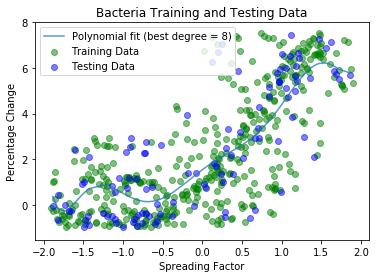

In [39]:
# your code here
# To visualise the results, sort the x values
idx = np.argsort(x_test[:,0])
x_test = x_test[idx]

# Use the above index to get the appropriate predicted values for y
# y values corresponding to sorted x
y_test = y_test[idx]

#Non-linear predicted values
y_poly_pred= y_poly_pred[idx]

plt.scatter(x_train, y_train, color = 'g', alpha = 0.5, label = "Training Data")
plt.scatter(x_test, y_test, color = 'b', alpha = 0.5, label = "Testing Data")
plt.plot(x_test, y_poly_pred, label = "Polynomial fit (best degree = " + str(d) + ")", alpha = 0.75)
plt.legend()
plt.xlabel("Spreading Factor")
plt.ylabel("Percentage Change")
plt.title("Bacteria Training and Testing Data")
plt.show()

Once again, just like in questions 4, we have a polynomial model of degree 8. So the same comments on question 4 also hold for this one. The main two comments were that the model seems to hold well for the middle value of our range of data, but seems to suffer from overfitting at the edges of our range of data.

<div class='exercise'><b> Question 6:   Improving model consistency [30 points total]</b>

In the previous sections, we compared many polynomial models to find the best degree. For each model of degree $n$, we considered all polynomial coefficients *up to* **degree `n`** using `Polynomial_features`. In this section $n=30$, and our **best model** can be chosen from any possible combination of the **30** degrees chosen.

For eg. a model with degrees `1,2,4,6`

The total number of such possible models is $2^{30}\approx10^9$ and searching through all of them would be laborious and computationally inefficient. Instead, we can use $Lasso$ Regularization which *switches off* highly unstable degree coefficients and gives us the most efficient solution.

**6.1** [10 pts] Find the best hyper-parameter `alpha`

First, we will use `cross_validation` to find the the best regularization parameter `alpha`. As before, we use the `bacteria_train.csv` for cross validation.

**NOTE**: You are free to experiment with the values of alpha. Our suggestion is to use in powers of 10 from $10^{-3}$ to $10^{3}$

#### Instructions
- Read the train csv file.
- Assign the predictor and response variables appropriately
- Select the max degree of the polynomial, and make a list of `alpha` values
- For each value of `alpha`:
    - Compute the polynomial features for the data.
    - Create a `Lasso` regularization model with the value of `alpha`
    - Perform k-fold cross validation with k=10 using `Lasso` as model.
    - Compute and print the $MSE$ of the train and validation data and store in separate lists. 
- Select the `alpha` for which the mean of the k-fold $MSE$ is the least.
- Store the previously selected values as `best_alpha` & print it.


#### Hints
- Limit the maximum degree to 30.
- Take at least three different values of alpha.
- Use sklearn `cross_validate()` to perform cross validation.

**6.2** [10 pts] Find the most significant degrees.

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this to find the most significant degrees over a given number of bootstraps. What we mean by the above is this:

For each bootstrap of the data, you will get some degrees that are **significant** $(\mid\beta_i\mid \gt 0.1)$. You would like to see which degree coefficients are significant over several such iterations.

As before, we use the `bacteria_train.csv` for cross validation.

NOTE: You are free to experiment with the number of bootstraps.

**Instructions**
- Make a dictionary called `significant_degrees` to store count of degrees for each bootstrap
- For each bootstrap:
    - Take a sample the dataframe with `frac=1`
    - Train a **Lasso** model with the `best_alpha` computed above.
    - Find the most significant polynomial coefficients using ($\mid\beta_i\mid \lt 0.1 $)
    - For each significant degree, update the count of that degree in `significant_degrees` 
- Plot the count of degrees for each bootstrap as a bar plot.


#### Hints
- Limit the maximum degree to 30.
- Take at least three different values of alpha.
- Use sklearn `cross_validate()` to perform cross validation.

**6.3** [5 pts] Compute and print the MSE on the test set

Now, from the previous plot, you can see that only some degrees are consistently significant over several bootstraps. You will now retrain the *L1* regularized model on the entire **training** data and find the test $MSE$

#### Instructions

- Based on the plot from 6.2, choose the maximum degree of the polynomial you will fit for your final model.
- Retrain the *regularized* ***LASSO*** model with your chosen degree on the entire test set and report the $MSE$ on the test set.
- Find and print the degrees of the polynomial that have cofficients with absolute value greater than 0.1
- Save the test $MSE$ to `best_mse_dict`.

**6.4** [5 pts] What are your observations?

- Compare your `best_degree` from question 5 with your chosen degree in 6.3 above and comment on the difference.
- Which degree coefficients in your best fit model from above are significant? If not all coefficients are significant, why?
- Compare your test $MSE$ in this question with the result from question 5. Which one is smaller, and by how much?
- Is your current model more reliable than the models in question 5 and prior? On what basis do you claim its robustness?
    
    
</div>

### Your Answers

<div class='exercise-r'>  
 
**6.1** [10 pts] Find the best hyper-parameter `alpha`
 
 First, we will use `cross_validation` to find the the best regularization parameter `alpha`. As before, we use the `bacteria_train.csv` for cross validation.
 
 **NOTE**: You are free to experiment with the values of alpha. Our suggestion is to use in powers of 10 from $10^{-3}$ to $10^{3}$
 
 #### Instructions
 - Read the train csv file.
 - Assign the predictor and response variables appropriately
 - Select the max degree of the polynomial, and make a list of `alpha` values
 - For each value of `alpha`:
 - Compute the polynomial features for the data.
 - Create a `Lasso` regularization model with the value of `alpha`
 - Perform k-fold cross validation with k=10 using `Lasso` as model.
 - Compute and print the $MSE$ of the train and validation data and store in separate lists.
 - Select the `alpha` for which the mean of the k-fold $MSE$ is the least.
 - Store the previously selected values as `best_alpha` & print it.
 
 
 #### Hints
 - Limit the maximum degree to 30.
 - Take at least three different values of alpha.
 - Use sklearn `cross_validate()` to perform cross validation.
 
 </div>

In [40]:
# Train data
# your code here
# Read the train and test csv files
bacteria_train = pd.read_csv(r'data/bacteria_train.csv')
bacteria_test = pd.read_csv(r'data/bacteria_test.csv')

# Assign the predictor and response variables appropriately
x_train, y_train = bacteria_train[['Spreading_factor']].values, bacteria_train.Perc_population.values
x_test, y_test = bacteria_test[['Spreading_factor']].values, bacteria_test.Perc_population.values

maxdeg = 30 # maximum degree 30

# List of hyper-parameter values
alphas = [1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3]

In [41]:
# Bootstrap first & then find the best regularization coefficient
# Per Alex Spiride's comment on Ed, we will ignore the Bootstrap
# your code here

# Create two empty lists to store training, validation and cross-validation MSEs
training_error, cross_validation_error = [],[]
# Compute the polynomial features for the training sets
# Per the following discussion on Ed, we set include_bias=False and leave fit_intercept as defaulted to True
# https://us.edstem.org/courses/2332/discussion/139210
x_poly_train = PolynomialFeatures(degree=maxdeg,include_bias=False).fit_transform(x_train.reshape(-1,1))
    
for i, alpha in enumerate(alphas):
    # For each i, fit a ridge regression on training set
    lasso = Lasso(alpha=alpha, max_iter=1e4)
        
    #Perform k-fold cross validation with k=10
    mse_score = cross_validate(lasso,x_poly_train,y_train,cv=10,scoring='neg_mean_squared_error',return_train_score=True)

    # Compute the training and cross-validation MSE and print
    mse_train = np.mean(abs(mse_score['train_score']))
    mse_cross = np.mean(abs(mse_score['test_score']))
    print("training error " + "for alpha " + str(alpha) +": " + str(mse_train))
    print("cross-validation error " + "for alpha " + str(alpha) +": " + str(mse_cross))
                                       
    # Append to list
    training_error.append(mse_train)
    cross_validation_error.append(mse_cross)
# Note we still get ConvergenceWarning but per Mike Sedelmeyer's comment on Ed, these warnings are fine

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468.7059024501486, tolerance: 0.24346217784710536
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475.8443880682876, tolerance: 0.2442329022786841
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 500.4608574200379, tolerance: 0.2405408422576316
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_

training error for alpha 0.001: 2.4952891293564683
cross-validation error for alpha 0.001: 2.593663403415122


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479.78964167120694, tolerance: 0.24346217784710536
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 486.786144705712, tolerance: 0.2442329022786841
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512.6221392221917, tolerance: 0.2405408422576316
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_

training error for alpha 0.01: 2.503497118370894
cross-validation error for alpha 0.01: 2.582721255088724


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 565.2907394508004, tolerance: 0.24346217784710536
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 573.8257644860873, tolerance: 0.2442329022786841
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 596.5527816260476, tolerance: 0.2405408422576316
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_

training error for alpha 0.1: 2.562885260104116
cross-validation error for alpha 0.1: 2.6211574068918315


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 854.403770160541, tolerance: 0.24346217784710536
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 878.3483943713134, tolerance: 0.2442329022786841
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 878.527451648167, tolerance: 0.2405408422576316
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_mo

training error for alpha 1.0: 4.117647501012324
cross-validation error for alpha 1.0: 4.217334628582754


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 949.4502797195561, tolerance: 0.24346217784710536
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 941.1611661739611, tolerance: 0.2442329022786841
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 956.734919171012, tolerance: 0.2405408422576316
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_m

training error for alpha 10.0: 4.922998210201372
cross-validation error for alpha 10.0: 5.2489592584130715


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 966.6853962086559, tolerance: 0.24346217784710536
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 979.8217333150059, tolerance: 0.2442329022786841
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 968.450059668222, tolerance: 0.2405408422576316
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_m

training error for alpha 100.0: 5.385086269231296
cross-validation error for alpha 100.0: 5.437186881184713


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 286.1248144778624, tolerance: 0.2405408422576316
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316.2097945430602, tolerance: 0.24509175627296587
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284.06542506874666, tolerance: 0.24548225488713915
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linea

training error for alpha 1000.0: 5.7490783659686215
cross-validation error for alpha 1000.0: 5.906584625279091


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274.8770435287472, tolerance: 0.248915116655643
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284.9586604540732, tolerance: 0.24778492824881893
  positive)


In [42]:
# your code here
#Store the previously selected values as best_alpha & print it.
# Select which the mean of the k-fold validation MSE is the least
min_mse = np.argmin(cross_validation_error)
# Select the alpha for which the mean of the k-fold  𝑀𝑆𝐸  is the least.
best_alpha = alphas[min_mse]
print("The best alpha is: " + str(best_alpha))

The best alpha is: 0.01


<div class='exercise-r'>  
 
**6.2** [10 pts] Find the most significant degrees.
 
 From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this to find the most significant degrees over a given number of bootstraps. What we mean by the above is this:
 
 For each bootstrap of the data, you will get some degrees that are **significant** $(\mid\beta_i\mid \gt 0.1)$. You would like to see which degree coefficients are significant over several such iterations.
 
 As before, we use the `bacteria_train.csv` for cross validation.
 
 NOTE: You are free to experiment with the number of bootstraps.
 
 **Instructions**
 - Make a dictionary called `significant_degrees` to store count of degrees for each bootstrap
 - For each bootstrap:
 - Take a sample the dataframe with `frac=1`
 - Train a **Lasso** model with the `best_alpha` computed above.
 - Find the most significant polynomial coefficients using ($\mid\beta_i\mid \lt 0.1 $)
 - For each significant degree, update the count of that degree in `significant_degrees`
 - Plot the count of degrees for each bootstrap as a bar plot.
 
 
 #### Hints
 - Limit the maximum degree to 30.
 - Take at least three different values of alpha.
 - Use sklearn `cross_validate()` to perform cross validation.
 
 </div>

In [43]:
# your code here
# Make empty dictionary to store count of degrees for each bootstrap
significant_degrees = {}
for i in range(maxdeg+1):
    significant_degrees[i+1] = 0

numBoots = 300

for a in range(numBoots):
    df_new = bacteria_train.sample(replace = True,frac = 1)
    
    # Assign the values of the 'x' column as the predictor from your sampled dataframe
    x = df_new[['Spreading_factor']].values
    # Assign the values of the 'y' column as the response from your sampled dataframe
    y = df_new['Perc_population'].values
    
    # Compute the polynomial features
    x_poly = PolynomialFeatures(degree = maxdeg, include_bias = False).fit_transform(x.reshape(-1,1))
    
    # Train a Lasso model with the best alpha computed above
    lasso = Lasso(alpha=best_alpha)
    lasso.fit(x_poly,y)
    
    for i, beta in enumerate(lasso.coef_):
        if abs(beta)>0.1:
            significant_degrees[i+1] = significant_degrees[i+1] + 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 579.073160953799, tolerance: 0.2540338461323877
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 590.3226769559204, tolerance: 0.27909043108132386
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 532.8206811137084, tolerance: 0.2539457964770686
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_m

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516.0411186807966, tolerance: 0.25920856349125293
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 554.3545575912349, tolerance: 0.281299938420331
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434.0990354548025, tolerance: 0.24003896096926716
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488.2741208503006, tolerance: 0.28049137290969267
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 478.8074808224684, tolerance: 0.2685156789096927
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 630.5655305983895, tolerance: 0.2907427030869977
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 537.3392712752544, tolerance: 0.2811762585990544
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502.41442309664274, tolerance: 0.2776680002638298
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526.2879908074233, tolerance: 0.26063520086288416
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 634.412452152867, tolerance: 0.29555372408510644
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 538.6411257298283, tolerance: 0.26531866564680856
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 489.4604805947287, tolerance: 0.2785147862387707
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 587.1767518569359, tolerance: 0.29401626976170214
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 580.4475500539494, tolerance: 0.2931630001106384
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 508.5773415879298, tolerance: 0.272279868701182
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_m

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 609.478802887985, tolerance: 0.30407230554042547
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 500.6731106993446, tolerance: 0.28190814822174937
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.6742765613791, tolerance: 0.2814319059744681
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564.3424620590104, tolerance: 0.2705495951763593
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 542.9234032791637, tolerance: 0.258730628587234
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 550.7705958439898, tolerance: 0.2707110319319149
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_mo

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 606.5448778597306, tolerance: 0.28452779279338064
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 568.4028310360519, tolerance: 0.2819961284600473
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 544.9262398090253, tolerance: 0.24583717917352244
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512.183712859556, tolerance: 0.2666767409933807
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 507.85965544255606, tolerance: 0.26304728890969264
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 549.4797790132368, tolerance: 0.26964070609834523
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear

(0, 10)

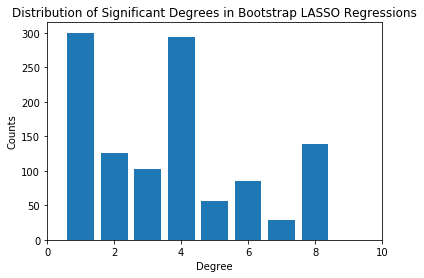

In [44]:
# your code here
# Plot bar chart of significant degrees
plt.bar(significant_degrees.keys(),significant_degrees.values())
plt.ylabel("Counts")
plt.xlabel("Degree")
plt.title("Distribution of Significant Degrees in Bootstrap LASSO Regressions")
plt.xlim(0,10)

<div class='exercise-r'>  
 
**6.3** [5 pts] Compute and print the MSE on the test set
 
 Now, from the previous plot, you can see that only some degrees are consistently significant over several bootstraps. You will now retrain the *L1* regularized model on the entire **training** data and find the test $MSE$
 
 #### Instructions
 
 - Based on the plot from 6.2, choose the maximum degree of the polynomial you will fit for your final model.
 - Retrain the *regularized* ***LASSO*** model with your chosen degree on the entire test set and report the $MSE$ on the test set.
 - Find and print the degrees of the polynomial that have cofficients with absolute value greater than 0.1
 - Save the test $MSE$ to `best_mse_dict`.
 
 </div>

In [45]:
# your code here
degree = 4 # chosen from bar plot in 6.2

# Polynomial features on test set
x_poly_train = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(x_train.reshape(-1,1))
x_poly_test = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(x_test.reshape(-1,1))

# Train a Lasso model with the best alpha computed above
lasso = Lasso(alpha=best_alpha)
lasso.fit(x_poly_train,y_train)

# Predict on the test set
y_pred = lasso.predict(x_poly_test)

best_mse_dict[6.3] = mean_squared_error(y_test, y_pred)
print("Our test MSE is: " + str(best_mse_dict[6.3]))

# Find and print the degrees of the polynomial that have coefficients with abs value greater than 0.1
for i, beta in enumerate(lasso.coef_):
    if abs(beta)>0.1:
        print("beta " + str(i+1) + " has coefficient: " + str(beta))

Our test MSE is: 2.601609082889326
beta 1 has coefficient: 2.0905291874486713
beta 2 has coefficient: 1.4374915647667388
beta 3 has coefficient: -0.10482101630489542
beta 4 has coefficient: -0.26387234484823796


In [46]:
# your code here


In [47]:
# your code here


<div class='exercise-r'>  
 
**6.4** [5 pts] What are your observations?
 
 - Compare your `best_degree` from question 5 with your chosen degree in 6.3 above and comment on the difference.
 - Which degree coefficients in your best fit model from above are significant? If not all coefficients are significant, why?
 - Compare your test $MSE$ in this question with the result from question 5. Which one is smaller, and by how much?
 - Is your current model more reliable than the models in question 5 and prior? On what basis do you claim its robustness?
 
 
 </div>

In [48]:
# your code here
print("Best MSE for question 5 is: " + str(best_mse_dict[5.3]))
print("Best MSE for question 6 is: " + str(best_mse_dict[6.3]))

Best MSE for question 5 is: 2.613010637353011
Best MSE for question 6 is: 2.601609082889326


This time our best degree is 4 polynomial model, whereas for question 4 and 5 the best degree polynomial model was 8. Likely this is due to our lasso regularisation which has helped us avoid much of the overfitting problems that we had mentioned about our model with polynomial degree 8 because lasso regularisation includes a loss function for overfitting. We found that all of the degree coefficients in our best fit model above are significant (although beta 3 is very close to being insignificant). This model actually has a better test MSE than the result for question 5. Our new model has a MSE that is smaller by about 0.007. I would argue that this model is more reliable than the models in question 5 and prior. This is shown by the fact that this model actually has a better MSE when evaluated on our test data set than our previous models. In particular, this model suffers less from overfitting which is the main reason that I would argue that this model is more robust.

<div class='exercise'><b> Question 7:   Analyze your best test MSEs for each sub section of the homework [10 points total]</b></div>

**7.1** [4 pts] Convert the `best_mse_dict` dictionary used to store the best MSE values from each section of the homework into a pandas dataframe. 

- Take a look at how the $MSE$ values have varied throughout the homework and plot these $MSE$ values in a bar chart, including proper labels and title.

**7.2** [6 pts] Which model do you think is best, and why? What are some of its drawbacks compared to the other methods you tested? 

### Your Answers

<div class='exercise-r'>  
 
**7.1** [4 pts] Convert the `best_mse_dict` dictionary used to store the best MSE values from each section of the homework into a pandas dataframe.
 
 - Take a look at how the $MSE$ values have varied throughout the homework and plot these $MSE$ values in a bar chart, including proper labels and title.
 
 </div>

In [49]:
# your code here
last_df = pd.DataFrame.from_dict(best_mse_dict, orient='index')
last_df.head()

,0
2.1,2.674863
3.2,2.736483
4.2,2.613011
5.3,2.613011
6.3,2.601609


Text(0.5, 1.0, 'Best MSEs')

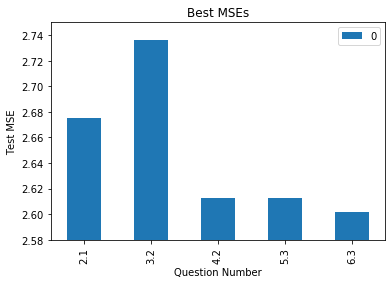

In [50]:
# your code here
ax = last_df.plot.bar()
ax.set_ylim(2.58,2.75)
ax.set_xlabel("Question Number")
ax.set_ylabel("Test MSE")
ax.set_title("Best MSEs")

**7.2** [6 pts] Which model do you think is best, and why? What are some of its drawbacks compared to the other methods you tested?

The best model is the one from question 6.3 because it performs the best (when evaluated by MSE) on the test dataset. Clearly, our model with the guesstimated degree from question 2.1 is not the best model as it has a significantly higher MSE on the test dataset than any other model. That's to be expected since our data set has a lot of variance and a polynomial of degree 2 would not capture enough of the variation. Our model of degree 15 from question 3.2 would also definitely not be a good choice because it severly suffers from overfitting. As we also mentioned, our polynomial models of degree 8 from questions 4.2 and 5.3 also likely suffer from a lot of overfitting at the edges of our range of data which has caused it to have higher MSE on the test set than our polynomial of degree 4 that we selected from in question 6.3. This is because regularisation includes a loss term that punishes overfitting making our model more robust and thus a better fit when we evaluated on the test data set. One drawback would be that since the polynomial model does not have as high of a degree, this model likely does not fit the middle of our range of data values as well as our models of degree 8. As we mentioned, our model has significiant variability, so if we were only concerned with the middle of our range of data values and did not care about the fit at the edges of the range, then in fact we may prefer the model with a higher degree because more bends in our fitted model can allow it to fit more of the variation in the middle of the range of our data set.

#### THE END